In [ ]:
from google.colab import files
uploaded = files.upload()


Saving telco_churn.xlsx to telco_churn.xlsx


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from google.colab import files


df = pd.read_excel('telco_churn.xlsx')


print("Initial Data:")
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(inplace=True)


if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
              'PaperlessBilling', 'PaymentMethod', 'Churn']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

df['Churn_Prediction'] = model.predict(X)

output_filename = 'churn_output.xlsx'
df.to_excel(output_filename, index=False)

files.download(output_filename)


Initial Data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy Score: 0.7846481876332623


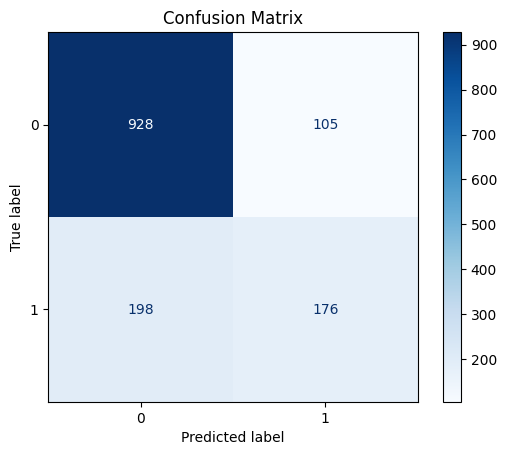

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


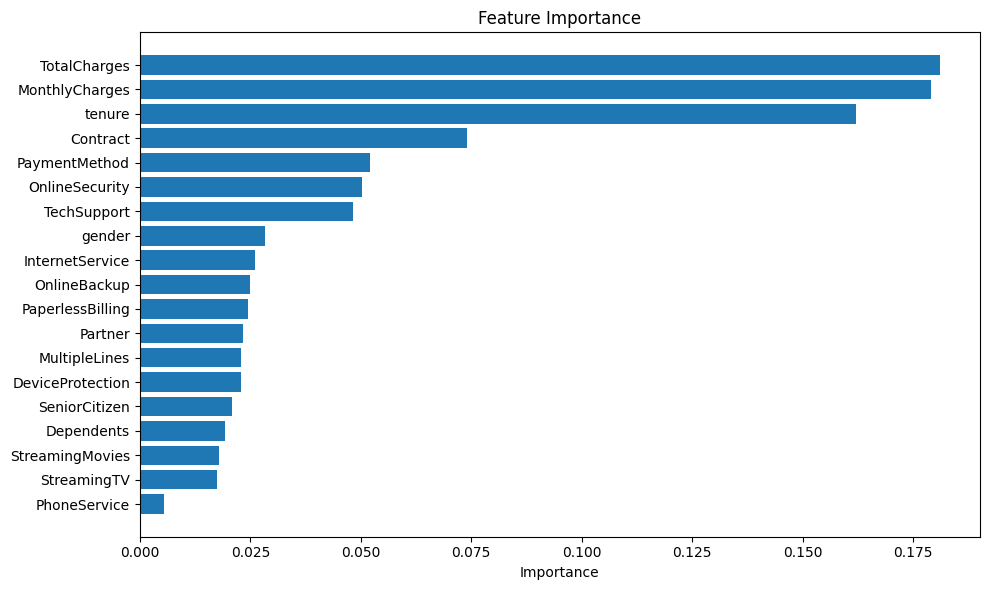

In [ ]:
importances = model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
